<a href="https://colab.research.google.com/github/MarinaRuizSO/eurosat_analysis/blob/master/eurosat_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.1

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow.compat.v2 as tf

from tensorflow.python.data.ops import dataset_ops
from tensorflow.python.data.ops import iterator_ops
from tensorflow.python.keras import backend as K
import sklearn.model_selection as sk


In [0]:
tf.compat.v1.enable_v2_behavior()

In [49]:
# create train and test set splits for the data
eurosat_data, info = tfds.load(name="eurosat", split="train", data_dir= "/~/tf_datasets/eurosat",  with_info=True) # added with_info
assert isinstance(eurosat_train, tf.data.Dataset)
print(eurosat_train)



<_OptionsDataset shapes: {filename: (), image: (64, 64, 3), label: ()}, types: {filename: tf.string, image: tf.uint8, label: tf.int64}>


In [55]:
DATASET_SIZE = len(list(eurosat_data))
train_size = int(0.75 * DATASET_SIZE)
test_size = int(0.25 * DATASET_SIZE)
print(DATASET_SIZE)
print(train_size)
print(test_size)



27000
20250
6750


In [0]:
#full_dataset = tf.data.Dataset(FLAGS.input_file) # not sure what this does
full_dataset = eurosat_data.shuffle(DATASET_SIZE+1)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)


In [83]:
for eurosat_example_train in train_dataset.take(1): # only take a single example
    image, label = eurosat_example_train["image"], eurosat_example_train["label"]
    plt.imshow(image.numpy()[:,:,1].astype(np.float32), cmap=plt.get_cmap("terrain"))
    print("Label: %d" % label.numpy())

KeyError: ignored

Label: 7


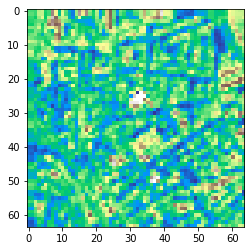

In [80]:
for eurosat_example_test in test_dataset.take(1): # only take a single example
    image, label = eurosat_example_test["image"], eurosat_example_test["label"]
    plt.imshow(image.numpy()[:,:,2].astype(np.float32), cmap=plt.get_cmap("terrain"))
    print("Label: %d" % label.numpy())